In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis




In [2]:
def show_grid_search(model, X_train, y_train, tuned_parameters):
    print("# Tuning hyper-parameters for accuracy")
    print()

    clf = GridSearchCV(
        model, tuned_parameters, cv=3,
        scoring='accuracy', n_jobs=-1
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
#        print("Grid scores on development set:")
#        print()
#        means = clf.cv_results_['mean_test_score']
#        stds = clf.cv_results_['std_test_score']
#        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#            print("%0.3f (+/-%0.03f) for %r"
#                  % (mean, std * 2, params))
#        print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# function for printing the ROC curve
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [3]:
# Load data
df = pd.read_csv("nhl_game_data/game_teams_stats.csv")
# normalize 
df['shots'] = (df['shots'] - df['shots'].mean()) / (df['shots'].max() - df['shots'].min())
df['goals'] = (df['goals'] - df['goals'].mean()) / (df['goals'].max() - df['goals'].min())
df['pim'] = (df['pim'] - df['pim'].mean()) / (df['pim'].max() - df['pim'].min())
df['powerPlayGoals'] = (df['powerPlayGoals'] - df['powerPlayGoals'].mean()) / (df['powerPlayGoals'].max() - df['powerPlayGoals'].min())
df['giveaways'] = (df['giveaways'] - df['giveaways'].mean()) / (df['giveaways'].max() - df['giveaways'].min())
df['takeaways'] = (df['takeaways'] - df['takeaways'].mean()) / (df['takeaways'].max() - df['takeaways'].min())
df['faceOffWinPercentage'] = (df['faceOffWinPercentage'] - df['faceOffWinPercentage'].mean()) / (df['faceOffWinPercentage'].max() - df['faceOffWinPercentage'].min())

# Change catergorical data to numerical
#df['won_true'] = df['won'].astype(int)
df['won_true'] = df['won'].map({True: 1, False:-1})
# Features
X = df[['goals', 'shots', 'pim', 'powerPlayGoals', 'giveaways', 'takeaways', 'faceOffWinPercentage']]
# Target Variable
y = df['won_true']

Make sure all models are using the same training set.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [41]:
X_train.describe()

,goals,shots,pim,powerPlayGoals,giveaways,takeaways,faceOffWinPercentage
count,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000,16007.000000
mean,-0.001193,0.000369,-0.000194,-0.000904,-0.000189,-0.000706,-0.000062
std,0.164652,0.126586,0.044197,0.126418,0.134402,0.123972,0.123542
min,-0.274305,-0.377711,-0.055605,-0.098726,-0.240227,-0.223219,-0.500000
25%,-0.174305,-0.081415,-0.022819,-0.098726,-0.101338,-0.094187,-0.082192
50%,0.025695,-0.007341,-0.011890,-0.098726,-0.018004,-0.029671,0.000000
75%,0.125695,0.085252,0.009968,0.067941,0.093107,0.067103,0.082192
max,0.725695,0.622289,0.944395,0.734607,0.676440,0.776781,0.460616


Compare all models without optimization to determine best fits to 
move forward with optimization. A few new models added to test.

C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR: 0.778603 (0.011108)
DTC: 0.691293 (0.024545)


C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RFC: 0.748718 (0.017680)
BC: 0.745516 (0.013014)
KNC: 0.743477 (0.015129)


C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.776562 (0.010532)
MLPC: 0.777582 (0.011872)


C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jkom8\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, Fut

LRCV: 0.778020 (0.010732)
LDA: 0.777436 (0.012019)
LSVC: 0.778020 (0.010332)


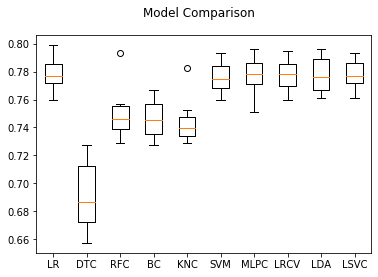

In [5]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('MLPC', MLPClassifier()))
models.append(('LRCV', LogisticRegressionCV()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LSVC', LinearSVC()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

DecisionTreeClassifier, RandomForestClassifier, Bagging Classifier, KNearestNeighbor do not hold up against the others.
Will be removed. Lets move onto optimization of all models.

LR model first.

In [6]:
lr = LogisticRegression()

tuned_parameters = [{'solver':['liblinear'],
                     'C': [10, 100, 150, 200, 300],
                    'penalty':('l1', 'l2'),
                    'multi_class':('auto', 'ovr')},
                   {'solver':('newton-cg', 'lbfgs', 'sag',),
                     'C': [10, 100, 150, 200, 300],
                    'penalty':['l2'],
                    'multi_class':('auto', 'ovr', 'multinomial')},
                   {'solver':['saga'],
                     'C': [10, 100, 150, 200, 300],
                    'penalty':('l1', 'l2'),
                    'multi_class':('auto', 'ovr', 'multinomial')}]

show_grid_search(lr, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.78      0.77      0.78      3413
           1       0.78      0.78      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [7]:
#{'C': 100, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}
lr = LogisticRegression(solver='liblinear', C=100, multi_class='auto', penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Optimize SVC.

In [8]:
svc = SVC()
# Select the optimal C, kernel and gamma parameter by cross-validation
tuned_parameters = [{'kernel':('rbf', 'poly', 'sigmoid'), 'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'gamma':(0.01, 0.1, 1, 10)}]
#clf = GridSearchCV(svc, tuned_parameters, n_jobs=-1, cv=3, scoring='accuracy', verbose=10)
show_grid_search(svc, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78      3413
           1       0.78      0.77      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [9]:
 #{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
svc = SVC(kernel='rbf', C=0.1, gamma=1, probability=True)
svc.fit(X_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

MLPClassifier next.

In [10]:
mlp = MLPClassifier()

tuned_parameters = [{'activation':('identity', 'logistic', 'tanh', 'relu'), 
                     'solver':('lbfgs', 'sgd', 'adam')},
                   {'activation':('identity', 'logistic', 'tanh', 'relu'), 
                     'solver':['sgd'],
                     'learning_rate':('constant', 'invscaling', 'adaptive')}]

show_grid_search(mlp, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'activation': 'relu', 'solver': 'adam'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.78      0.78      0.78      3413
           1       0.78      0.78      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [11]:
#{'activation': 'logistic', 'solver': 'adam'}
mlp = MLPClassifier(activation='relu', solver='adam')
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

LogisticRegressionCV next

In [12]:
lrcv = LogisticRegressionCV()

tuned_parameters = [{'solver':['liblinear'],
                    'penalty':('l1', 'l2'),
                    'multi_class':('auto', 'ovr'),
                    'cv':[5]},
                   {'solver':('newton-cg', 'lbfgs', 'sag',),
                    'penalty':['l2'],
                    'multi_class':('auto', 'ovr', 'multinomial'),
                    'cv':[5]},
                   {'solver':['saga'],
                    'penalty':('l1', 'l2'),
                    'multi_class':('auto', 'ovr', 'multinomial'),
                    'cv':[5]}]

show_grid_search(lrcv, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'cv': 5, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.78      0.77      0.78      3413
           1       0.78      0.78      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [13]:
lrcv = LogisticRegressionCV(solver='newton-cg', multi_class='multinomial', penalty='l2', cv=5)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)

In [14]:
lda = LinearDiscriminantAnalysis()

tuned_parameters = [{'solver':('svd', 'lsqr', 'eigen'),}]

show_grid_search(lda, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'solver': 'svd'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.77      0.79      0.78      3413
           1       0.78      0.77      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [15]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [16]:
lsvc = LinearSVC()

tuned_parameters = [{'penalty':('l1', 'l2'),
                     'loss':['squared_hinge'],
                    'dual':[False],
                    'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'multi_class':('ovr', 'crammer_singer')},
                   {'penalty':['l2'],
                    'loss':('hinge', 'squared_hinge'),
                    'dual':[True],
                    'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'multi_class':('ovr', 'crammer_singer')},
                    {'penalty':['l2'],
                    'loss':['squared_hinge'],
                    'dual':[False],
                    'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'multi_class':('ovr', 'crammer_singer')},
                   {'penalty':('l1', 'l2'),
                     'loss':['squared_hinge'],
                    'dual':[False],
                    'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'multi_class':('ovr', 'crammer_singer')},
                   {'penalty':['l2'],
                    'dual':(True, False),
                    'C':(0.0001, 0.001, 0.01, .1, 1, 10),
                    'multi_class':('ovr', 'crammer_singer')}]

show_grid_search(lsvc, X_train, y_train, tuned_parameters)

# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 1, 'dual': False, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l1'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

          -1       0.78      0.77      0.78      3413
           1       0.78      0.78      0.78      3448

    accuracy                           0.78      6861
   macro avg       0.78      0.78      0.78      6861
weighted avg       0.78      0.78      0.78      6861




In [17]:
#{'C': 1, 'dual': False, 'loss': 'squared_hinge', 'multi_class': 'ovr', 'penalty': 'l1'}
lsvc = LinearSVC(C=1, dual=False, loss='squared_hinge',multi_class='ovr', penalty='l1')
lsvc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0)

Recompare the optimized fit models.

LR: 0.778311 (0.010344)
SVM: 0.778166 (0.012244)
MLPC: 0.777290 (0.010840)
LRCV: 0.778895 (0.010301)
LDA: 0.777436 (0.012019)
LSVC: 0.778165 (0.010813)


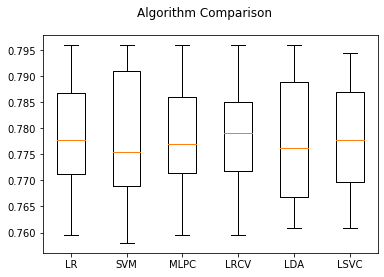

In [18]:
# prepare models
models = []
models.append(('LR', lr))
models.append(('SVM', svc))
models.append(('MLPC', mlp))
models.append(('LRCV', lrcv))
models.append(('LDA', lda))
models.append(('LSVC', lsvc))



results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Text(0.5, 0, 'Accuracy')

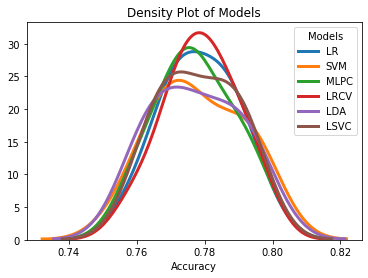

In [19]:
import seaborn as sns

# Iterate through the models
for result, name in zip(results, names):
    # Subset to the airline
    subset = result
    
    # Draw the density plot
    sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Models')
plt.title('Density Plot of Models')
plt.xlabel('Accuracy')

In [ ]:
for result, name in zip(results, names):
    

ROC Curves

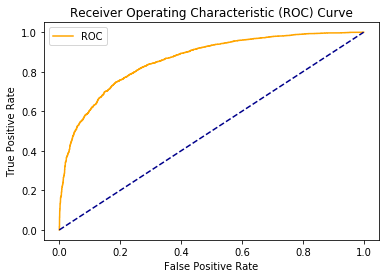

0.8609873671229766

In [20]:
#LR
y_probs = lr.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lr_auc = roc_auc_score(y_test, y_probs)
lr_auc

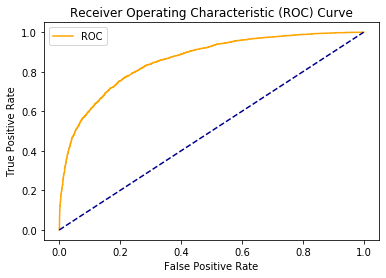

0.8598625818574128

In [21]:
#SVC
y_probs = svc.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
svc_auc = roc_auc_score(y_test, y_probs)
svc_auc

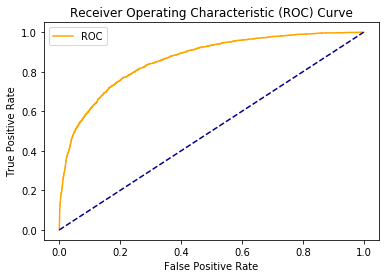

0.8619218485618316

In [22]:
#MLPClassifier
y_probs = mlp.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
mlp_auc = roc_auc_score(y_test, y_probs)
mlp_auc

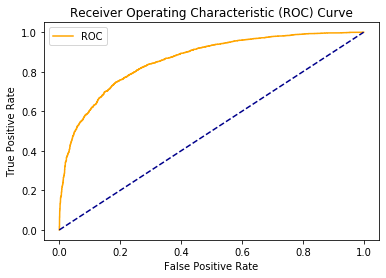

0.8609902563081108

In [23]:
#LRCV
y_probs = lrcv.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lrcv_auc = roc_auc_score(y_test, y_probs)
lrcv_auc

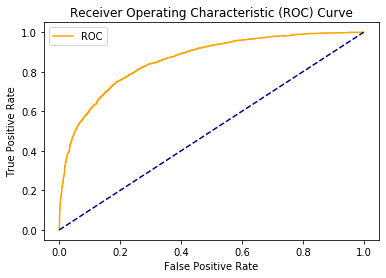

0.8608857357870786

In [24]:
#LDA
y_probs = lda.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lda_auc = roc_auc_score(y_test, y_probs)
lda_auc

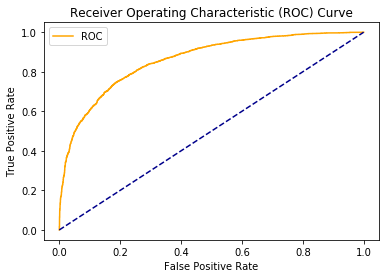

0.8609679925873706

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
scaler = StandardScaler()

#LSVC does not have predcit_proba so must go around
cclf = CalibratedClassifierCV(base_estimator=lsvc, cv=5)
cclf.fit(X_train, y_train)


#LSVC
y_probs = cclf.predict_proba(X_test) # we have to get the probability values to plot roc curve
y_probs = y_probs[:, 1] # keep probabilities for the positive outcome only
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plot_roc_curve(fpr, tpr)
lsvc_auc = roc_auc_score(y_test, y_probs)
lsvc_auc

Confusion Matrixes

In [26]:
print('LR Confusion Matrix')
confusion_matrix(y_test, lr.predict(X_test))

LR Confusion Matrix


array([[2635,  778],
       [ 749, 2699]], dtype=int64)

In [27]:
print('SVC Confusion Matrix')
confusion_matrix(y_test, svc.predict(X_test))

SVC Confusion Matrix


array([[2680,  733],
       [ 791, 2657]], dtype=int64)

In [28]:
print('MLP Confusion Matrix')
confusion_matrix(y_test, mlp.predict(X_test))

MLP Confusion Matrix


array([[2658,  755],
       [ 777, 2671]], dtype=int64)

In [29]:
print('LRCV Confusion Matrix')
confusion_matrix(y_test, lrcv.predict(X_test))

LRCV Confusion Matrix


array([[2634,  779],
       [ 748, 2700]], dtype=int64)

In [30]:
print('LDA Confusion Matrix')
confusion_matrix(y_test, lda.predict(X_test))

LDA Confusion Matrix


array([[2686,  727],
       [ 796, 2652]], dtype=int64)

In [31]:
print('LSVC Confusion Matrix')
confusion_matrix(y_test, lsvc.predict(X_test))

LSVC Confusion Matrix


array([[2641,  772],
       [ 759, 2689]], dtype=int64)